<a href="https://colab.research.google.com/github/prp20/Machine_learning_practice/blob/main/Natural_language_processing/NLP_learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Basic libraries and dataset

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
dataset = pd.read_csv('spam.tsv', sep='\t')

# View the dataset
dataset

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


### Understanding the dataset

In [57]:
dataset.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [58]:
dataset.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [59]:
dataset.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [60]:
ham = dataset[dataset['label'] == 'ham']
spam = dataset[dataset['label'] == 'spam']

In [61]:
ham = ham.sample(spam.shape[0])

In [62]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [63]:
data = ham.append(spam, ignore_index=True)

<ipython-input-63-ea3b8d22737f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam, ignore_index=True)


In [64]:
data

,label,message,length,punct
0,ham,Honeybee Said: *I'm d Sweetest in d World* God...,158,17
1,ham,Guessin you ain't gonna be here before 9?,41,2
2,ham,Hey i've booked the pilates and yoga lesson al...,59,4
3,ham,Pls dont forget to study,24,0
4,ham,I had been hoping i would not have to send you...,297,12
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


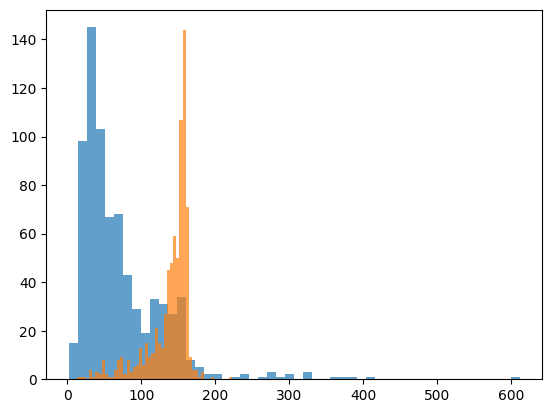

In [65]:
plt.hist(data[data['label']=='ham']['length'], bins=50, alpha=0.7)
plt.hist(data[data['label']=='spam']['length'], bins=50, alpha=0.7)
plt.show()

### Split the dataset into Train Test datasets for Model Train and Predictions

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, shuffle=True, random_state=42)

In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1195,), (299,), (1195,), (299,))

### Use the Random Forest Classifier for Classification

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [70]:
classifier = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])

In [71]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [72]:
predictions = classifier.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [74]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9431438127090301

In [75]:
print(confusion_matrix(y_test, predictions))

[[145   0]
 [ 17 137]]


In [76]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.94       145
        spam       1.00      0.89      0.94       154

    accuracy                           0.94       299
   macro avg       0.95      0.94      0.94       299
weighted avg       0.95      0.94      0.94       299



### Use the SVM model for classification

In [77]:
from sklearn.svm import SVC

svc_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svc', SVC(C=100, gamma='auto'))
])

In [78]:
svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('svc', SVC(C=100, gamma='auto'))])

In [79]:
svc_preds = svc_pipeline.predict(X_test)

svc_accuracy = accuracy_score(y_test, svc_preds)
svc_accuracy



0.8695652173913043

In [80]:
print(confusion_matrix(y_test, svc_preds))

[[144   1]
 [ 38 116]]


In [81]:
print(classification_report(y_test, svc_preds))

              precision    recall  f1-score   support

         ham       0.79      0.99      0.88       145
        spam       0.99      0.75      0.86       154

    accuracy                           0.87       299
   macro avg       0.89      0.87      0.87       299
weighted avg       0.89      0.87      0.87       299

